In [1]:
#1. Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix

from imblearn.over_sampling import SMOTE

In [2]:
#2. Load dataset New Player

new = pd.read_csv('new_players.csv')
new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [3]:
new.columns

Index(['Unnamed: 0', 'player_id', 'age', 'player_height', 'player_weight',
       'college', 'country', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

In [4]:
#3. Load dataset nba Player

nba = pd.read_csv('nba_players.csv')
nba

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


In [118]:
# Kolom Yang ada pada data set nba

nba.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

# Cleaning and Preprocessing

In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [7]:
nba.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [8]:
list_item = []
for col in nba.columns:
    list_item.append([col, nba[col].dtype, nba[col].isna().sum(), round((nba[col].isna().sum()/len(nba[col]))*100,2),
                      nba[col].nunique(), list(nba[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'type_data', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,type_data,null,nulPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,11145,"[957, 95, 3580, 1686, 4228]"
1,Unnamed: 0.1,int64,0,0.0,11145,"[2564, 6524, 2608, 10968, 8660]"
2,player_name,object,0,0.0,2235,"[Juancho Hernangomez, Tomas Satoransky, Furkan..."
3,team_abbreviation,object,0,0.0,36,"[NYK, SAC, LAC, LAL, BOS]"
4,age,float64,0,0.0,27,"[22.0, 24.0, 32.0, 30.0]"
5,player_height,float64,0,0.0,30,"[198.12, 205.74, 195.58, 200.66]"
6,player_weight,float64,0,0.0,157,"[90.7184, 94.34713599999999, 85.728888, 117.93..."
7,college,object,0,0.0,316,"[Santa Clara, California, Ohio State, None, Io..."
8,country,object,0,0.0,76,"[USA, Croatia]"
9,draft_year,object,0,0.0,45,"[2012, 1994, 1993, 2007]"


# Cleaning and Preprocessing

<AxesSubplot:>

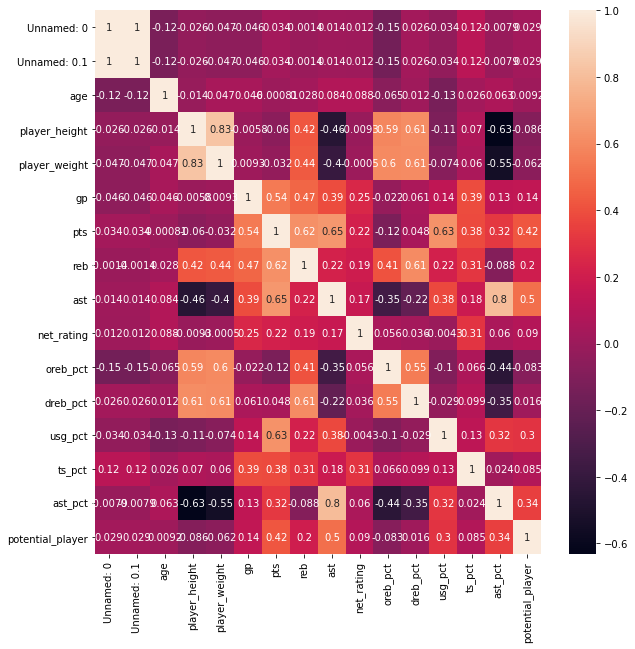

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(nba.corr(),annot=True)

In [119]:
#Banyaknya pemain yang berasal dari Universitas tertebtu

nba['college'].value_counts()

None                              1684
Kentucky                           360
Duke                               331
North Carolina                     318
UCLA                               280
                                  ... 
University of Colorado Boulder       1
West Virginia Tech                   1
Stony Brook, N.Y.                    1
Loyola (IL)                          1
Miami (Fla.)                         1
Name: college, Length: 316, dtype: int64

In [120]:
#Banyaknya Pemain yang berasal dari negara tertentu

nba['country'].value_counts()

USA                    9410
France                  153
Canada                  140
Spain                    79
Brazil                   78
                       ... 
Trinidad and Tobago       1
Sudan (UK)                1
Ghana                     1
Guinea                    1
Angola                    1
Name: country, Length: 76, dtype: int64

In [12]:
nba['draft_year'].value_counts().head(10)

Undrafted    1942
1998          454
2003          430
2005          420
1996          406
2001          403
2008          381
1999          366
2000          364
2004          362
Name: draft_year, dtype: int64

In [13]:
nba['draft_round'].value_counts()

1            6513
2            2629
Undrafted    1959
3              20
4              12
6               5
7               5
8               2
Name: draft_round, dtype: int64

In [14]:
nba['draft_number'].value_counts()

Undrafted    1959
5             320
1             320
4             311
3             299
             ... 
87              1
127             1
78              1
139             1
69              1
Name: draft_number, Length: 75, dtype: int64

In [15]:
nba['player_name'].value_counts()

Vince Carter           22
Dirk Nowitzki          21
Kobe Bryant            20
Kevin Garnett          20
Jamal Crawford         19
                       ..
Craig Ehlo              1
Lynn Greer              1
Kevin Hervey            1
Andreas Glyniadakis     1
George King             1
Name: player_name, Length: 2235, dtype: int64

In [16]:
nba[nba['player_name'] == 'Dirk Nowitzki'].head(5)

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
1236,1236,1236,Dirk Nowitzki,DAL,21.0,213.36,107.501304,None,Germany,1998,...,3.4,1.0,-1.5,0.052,0.139,0.223,0.492,0.082,1998-99,0
1370,1370,1370,Dirk Nowitzki,DAL,22.0,213.36,107.501304,None,Germany,1998,...,6.5,2.5,0.5,0.038,0.156,0.212,0.564,0.107,1999-00,0
1805,1805,1805,Dirk Nowitzki,DAL,23.0,210.82,107.501304,None,Germany,1998,...,9.2,2.1,7.8,0.044,0.220,0.237,0.601,0.092,2000-01,0
2609,2609,2609,Dirk Nowitzki,DAL,24.0,213.36,111.130040,None,Germany,1998,...,9.9,2.4,6.6,0.048,0.240,0.254,0.599,0.105,2001-02,0
2812,2812,2812,Dirk Nowitzki,DAL,25.0,213.36,111.130040,None,Germany,1998,...,9.9,3.0,12.9,0.029,0.249,0.273,0.581,0.129,2002-03,0


Nama player yang lebih dari 1 tidak di hapus, karena itu adalah data yang benar. karena hampir setia tahun para pemain pasti melakukan perubahan. contohnya pada pemain diatas.

In [17]:
nba_clean = nba.drop(['Unnamed: 0', 'Unnamed: 0.1' , 'player_name', 
                      'team_abbreviation', 'college', 'country', 'draft_year','draft_round',
                      'season','draft_number'],axis=1)

In [18]:
nba_clean

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,0
11141,23.0,195.58,97.522280,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,0
11142,28.0,213.36,117.933920,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,0
11143,27.0,208.28,104.779752,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,0


In [19]:
scaler = StandardScaler()

scaler.fit(nba_clean)
scaler_feature = scaler.transform(nba_clean)

In [20]:
nba_scaled = pd.DataFrame(scaler_feature, columns=nba_clean.columns)
nba_scaled

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264,-0.206308
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381,-0.206308
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107,-0.206308
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160,-0.206308
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580,-0.206308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.438567,0.164023,0.737377,-0.391909,0.555873,0.009272,-0.028040,-0.935049,0.980036,-0.705983,-0.206308
11141,-0.959649,-0.569369,-0.247746,-1.476196,-1.167015,-1.306480,-0.950612,-0.020255,-0.856596,-1.325686,-0.407188,-0.284192,-1.032255,-0.206308
11142,0.191372,1.365225,1.375352,-0.119905,-0.341434,0.617150,-0.391909,0.638177,-0.605950,1.190480,-1.236684,1.334020,-0.579685,-0.206308
11143,-0.038832,0.812484,0.329355,-1.276742,-1.015378,-0.224438,-0.783001,-1.172512,0.670066,1.506979,-1.123571,0.130475,-0.790182,-0.206308


In [21]:
poten = nba['potential_player']

In [22]:
poten.value_counts()

0    10690
1      455
Name: potential_player, dtype: int64

# Visualisasi

In [23]:
skor = nba.sort_values('pts', ascending=False).head(1).iloc[0,13]
player = nba.sort_values('pts', ascending=False).head(1).iloc[0,2]
print(f'pemain yang pernah mencetak skor tertinggi adalah {player} dengan skor {skor} pts')

pemain yang pernah mencetak skor tertinggi adalah James Harden dengan skor 36.1 pts


In [24]:
assist = nba.sort_values('ast', ascending=False).head(1).iloc[0,15]
player = nba.sort_values('ast', ascending=False).head(1).iloc[0,2]
print(f'pemain yang pernah mencetak assist tertinggi adalah {player} dengan assis {assist}')

pemain yang pernah mencetak assist tertinggi adalah Rajon Rondo dengan assis 11.7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '18.0'),
  Text(1, 0, '19.0'),
  Text(2, 0, '20.0'),
  Text(3, 0, '21.0'),
  Text(4, 0, '22.0'),
  Text(5, 0, '23.0'),
  Text(6, 0, '24.0'),
  Text(7, 0, '25.0'),
  Text(8, 0, '26.0'),
  Text(9, 0, '27.0'),
  Text(10, 0, '28.0'),
  Text(11, 0, '29.0'),
  Text(12, 0, '30.0'),
  Text(13, 0, '31.0'),
  Text(14, 0, '32.0'),
  Text(15, 0, '33.0'),
  Text(16, 0, '34.0'),
  Text(17, 0, '35.0'),
  Text(18, 0, '36.0'),
  Text(19, 0, '37.0'),
  Text(20, 0, '38.0'),
  Text(21, 0, '39.0'),
  Text(22, 0, '40.0'),
  Text(23, 0, '41.0'),
  Text(24, 0, '42.0'),
  Text(25, 0, '43.0'),
  Text(26, 0, '44.0')])

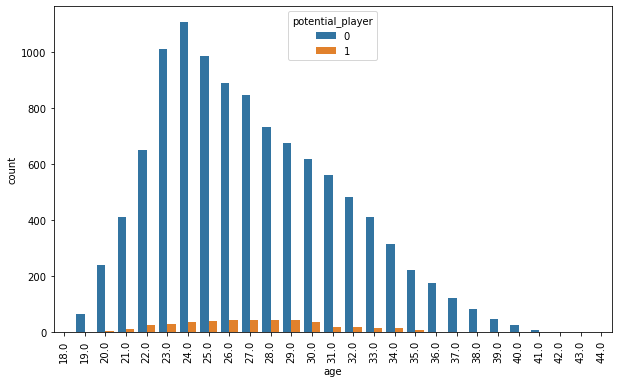

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='age', hue='potential_player', data=nba)
plt.xticks(rotation=90)

In [26]:
def potential_player(x) :
    if x == 1:
        x = 'Potential'
    else :
        x = 'Non Potential'
    return x

In [27]:
nba_clean['potential_player'] = nba_clean['potential_player'].map(potential_player)

In [28]:
nba_clean

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,Non Potential
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,Non Potential
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,Non Potential
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,Non Potential
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,Non Potential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,Non Potential
11141,23.0,195.58,97.522280,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,Non Potential
11142,28.0,213.36,117.933920,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,Non Potential
11143,27.0,208.28,104.779752,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,Non Potential


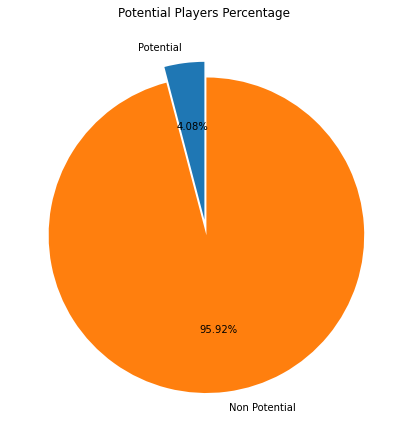

In [29]:
values = list(nba_clean['potential_player'].value_counts().sort_values().values)
labels = list(nba_clean['potential_player'].value_counts().sort_values().index)
explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,explode=explode,
        startangle=90, autopct=lambda p:f'{p:.2f}%')
plt.title('Potential Players Percentage')
plt.tight_layout()
plt.show()

Pada Pie Chart diatas dapat dilihat terdapat hanya 4.08% pemain yang potensial sedangkan 95.92% sisanya tidak potensial

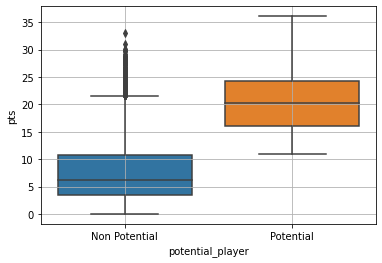

In [30]:
sns.boxplot(x='potential_player', y='pts', data=nba_clean)
plt.grid()
plt.show()

dapat dilihat dari boxplot di atas, pemain yang tidak potensial memiliki pts yang lebih rendah dibandiingkan dengan pemain yang potensial

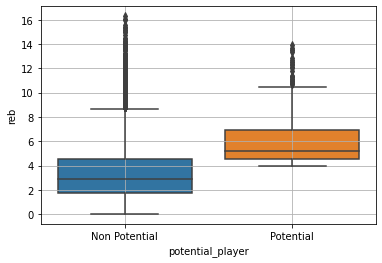

In [31]:
sns.boxplot(x='potential_player', y='reb', data=nba_clean)
plt.grid()
plt.show()

dari boxplot di atas dapat dilihat, pemain yang tidak ber potensial memiliki nilai reb yang lebih rendah dibandingkan dengan pemain yang ber potensial

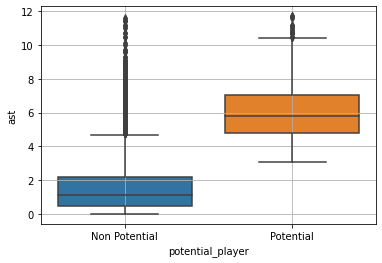

In [32]:
sns.boxplot(x='potential_player', y='ast', data=nba_clean)
plt.grid()
plt.show()

dari boxplot diatas dapat dilihar, pemain yang memiliki potensial memilii nilai ast yang lebih tinggi dibanding dengan pemain yang tidak potensial

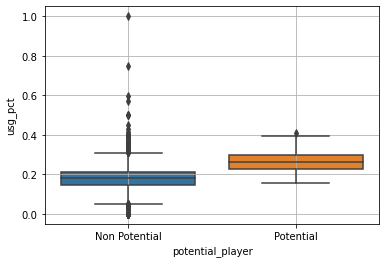

In [33]:
sns.boxplot(x='potential_player', y='usg_pct', data=nba_clean)
plt.grid()
plt.show()

dapat dilihat dari boxplot diatas pemain yang memiliki potensial memiliki nilai usg_pct lebih tinggu dari pemain yang tidak potensial

In [34]:
nba['player_height'].value_counts().sort_values(ascending=True)

167.64       1
183.00       1
203.00       1
231.14       3
160.02       5
196.00       5
226.06       6
223.52       7
201.00      13
165.10      13
228.60      16
175.26      24
220.98      43
177.80      52
218.44      82
180.34     104
215.90     193
182.88     254
185.42     440
187.96     496
193.04     619
213.36     673
190.50     755
195.58     807
198.12     918
210.82     958
203.20    1061
200.66    1093
208.28    1133
205.74    1369
Name: player_height, dtype: int64

pemain tertingi memiliki tinggi _**205.74**_ sebanyak _**1369**_ pemain sedanakan pemain terendahnya sejumlah _**1**_ orang dengna tinggi _**167.64**_

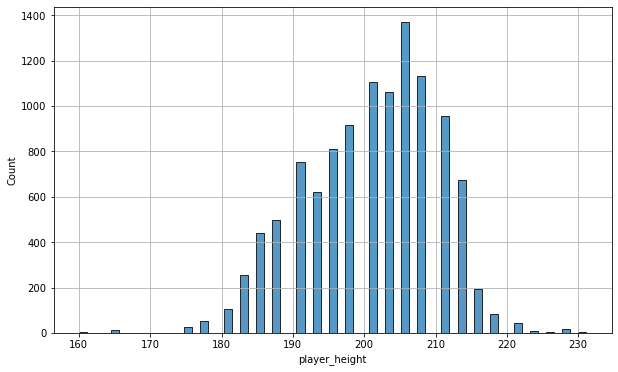

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(nba['player_height'])
plt.grid()
plt.show()

In [36]:
nba['country'].value_counts().sort_values(ascending=True)

Angola                    1
Sudan                     1
Trinidad and Tobago       1
Guinea                    1
Ghana                     1
                       ... 
Brazil                   78
Spain                    79
Canada                  140
France                  153
USA                    9410
Name: country, Length: 76, dtype: int64

Pemain terbanyak sebanyak **9410** berasal dari **USA** sedangkan yang terendah sebanyak **1** berasal dari **Sudan, Trinidad and Tobago, Sudan (UK), Guinea, Ghana** 

# Train and Test


## Cleaning 2

untuk menghilangkan kolom potential_player.

In [37]:
nba_clean = nba.drop(['Unnamed: 0', 'Unnamed: 0.1' , 'player_name', 
                      'team_abbreviation', 'college', 'country', 'draft_year','draft_round',
                      'season','draft_number','potential_player'],axis=1)

In [38]:
scaler = StandardScaler()

scaler.fit(nba_clean)
scaler_feature = scaler.transform(nba_clean)
nba_scaled = pd.DataFrame(scaler_feature, columns=nba_clean.columns)
nba_scaled

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.438567,0.164023,0.737377,-0.391909,0.555873,0.009272,-0.028040,-0.935049,0.980036,-0.705983
11141,-0.959649,-0.569369,-0.247746,-1.476196,-1.167015,-1.306480,-0.950612,-0.020255,-0.856596,-1.325686,-0.407188,-0.284192,-1.032255
11142,0.191372,1.365225,1.375352,-0.119905,-0.341434,0.617150,-0.391909,0.638177,-0.605950,1.190480,-1.236684,1.334020,-0.579685
11143,-0.038832,0.812484,0.329355,-1.276742,-1.015378,-0.224438,-0.783001,-1.172512,0.670066,1.506979,-1.123571,0.130475,-0.790182


## TRAIN


In [39]:
x_train,x_test,y_train,y_test = train_test_split(nba_scaled, poten, test_size=0.2, random_state=10)

In [40]:
x_train

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
7292,-1.189853,0.536113,0.185080,1.196495,0.602086,2.340403,-0.280169,-0.291859,1.718222,1.206305,-0.048997,0.079906,-0.653359
776,0.881985,0.536113,0.112942,0.239113,-0.880589,-0.785497,-0.783001,-0.258937,0.009272,0.051084,0.573125,-0.719086,-0.506010
4738,-0.729445,-1.398480,-0.969123,-1.795323,-1.369198,-1.025951,-0.280169,-0.711609,0.214346,-0.898412,-2.348963,-5.138828,1.777890
5337,-0.499241,0.536113,0.834319,-1.117178,-0.779498,0.136243,-0.950612,-0.966752,0.806782,-0.107165,-1.632580,0.130475,-1.263802
9515,1.572598,-1.122110,-1.329811,0.518349,-0.240343,-0.625194,0.166794,0.350113,-1.016098,-0.249590,0.158377,0.413662,0.693826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,-0.959649,1.088854,0.221149,-0.040124,0.096629,0.897680,-0.447779,-0.036716,1.011856,1.317080,-0.180962,1.151972,-0.558635
7291,-0.499241,0.259743,0.653975,-0.159796,-0.476223,0.577075,-0.559520,-0.588153,1.467576,0.620782,-0.765380,0.009109,-0.548110
1344,-0.038832,0.536113,0.293287,0.478458,1.023301,2.580856,0.446145,-0.678688,0.783996,1.412029,0.648533,-0.304419,0.062333
7293,0.881985,-0.845739,-0.319884,1.076822,0.130326,0.416772,-0.336039,0.736942,0.259918,-0.043865,-0.124406,-0.193167,-0.579685


In [41]:
x_test

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
430,1.112189,-1.122110,-1.329811,1.196495,0.298812,0.496923,5.362731,0.012666,-0.469234,-0.407839,-0.576858,0.170930,3.503971
10535,-1.650262,-0.845739,-0.355953,0.877367,-0.071857,-0.264514,-0.336039,0.094971,-0.788238,-0.692688,-0.708823,-0.162826,-0.663884
7162,-0.729445,0.536113,0.473631,0.757695,0.383055,0.456848,-0.391909,0.259579,0.419420,0.035259,-0.199814,0.585597,-0.642834
8394,1.802802,-1.674851,-1.329811,-1.715542,-0.594163,-1.306480,-0.503650,-0.119020,-1.266744,-1.531410,1.176394,0.636166,0.893799
4862,0.881985,0.536113,1.014663,0.159331,-1.183864,-0.785497,-0.894742,0.210196,0.920712,-0.202115,-2.066180,0.393435,-1.053304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,-0.269036,0.536113,0.112942,0.518349,-0.594163,-0.504967,-0.894742,0.629947,0.647280,0.082734,0.007559,0.696849,-1.074354
10881,-1.420058,0.812484,0.437562,-0.439033,-0.509920,-0.424816,-0.727131,-0.069638,0.624494,-0.755988,-0.953902,1.698118,-0.853332
1462,-0.038832,0.536113,0.473631,1.196495,0.854815,1.378587,-0.503650,-0.374163,1.103000,-0.297064,0.158377,-0.051574,-0.905956
3042,-0.499241,-1.398480,-0.608434,-1.595869,-1.150167,-1.146177,-0.559520,0.267809,-0.833810,-0.566089,2.213264,-1.872062,1.630541


# Modeling Machine Learning

## 1. Decision Tree

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
dt_pred = dt.predict(x_test)
dt_proba = dt.predict_proba(x_test)

In [45]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.97      0.98      0.97        93

    accuracy                           1.00      2229
   macro avg       0.98      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [47]:
tndt, fpdt, fndt, tpdt = confusion_matrix(y_test, dt_pred).ravel()
print(confusion_matrix(y_test, dt_pred))

[[2133    3]
 [   2   91]]


## 2. Gradient Boost

In [48]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [49]:
gb_pred = gb.predict(x_test)
gb_proba = gb.predict_proba(x_test)

In [50]:
gb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.98      1.00      0.99        93

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [52]:
tngb, fpgb, fngb, tpgb = confusion_matrix(y_test, gb_pred).ravel()
print(confusion_matrix(y_test, gb_pred))

[[2134    2]
 [   0   93]]


# Evaluation

## Decision Tree Evaluation


In [53]:
probdt = dt_proba[:,1]
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, probdt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

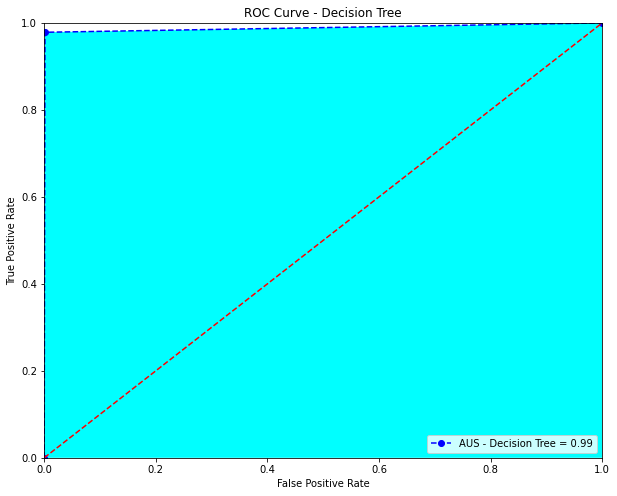

In [54]:
plt.figure(figsize=(10,8))
plt.title ('ROC Curve - Decision Tree')
plt.plot (fpr_dt, tpr_dt, 'b--o', label='AUS - Decision Tree = {}'.format(round(roc_auc_dt,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dt,tpr_dt, 0, facecolor='cyan', alpha=1)
plt.legend(loc='lower right')
plt.show()

## Gradient Boost Evaluation

In [55]:
probgb = gb_proba[:,1]
fpr_gb, tpr_gb, threshold_gb = roc_curve(y_test, probgb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

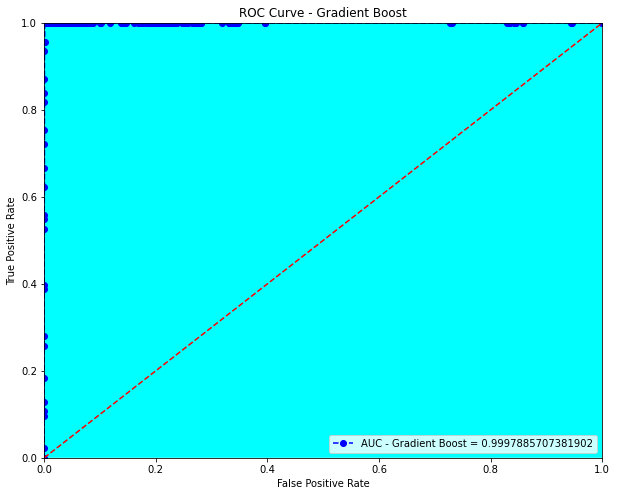

In [56]:
plt.figure(figsize=(10,8))
plt.title('ROC Curve - Gradient Boost')
plt.plot(fpr_gb, tpr_gb, 'b--o', label='AUC - Gradient Boost = {}'.format(roc_auc_gb))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gb, tpr_gb, 0, facecolor='cyan', alpha=1)
plt.legend(loc='lower right')
plt.show()

## Model Comparation

In [57]:
knn= KNeighborsClassifier()
score= cross_val_score(knn, x_train, y_train, cv=10, scoring='recall') 
print(score)
print(score.mean())

[0.66666667 0.75       0.77777778 0.69444444 0.86486486 0.75675676
 0.66666667 0.77777778 0.77777778 0.75      ]
0.7482732732732733


In [58]:

model_comp = pd.DataFrame({
    "Decision Tree" : [accuracy_score(y_test, dt_pred),precision_score(y_test,dt_pred),recall_score(y_test,dt_pred),
                      f1_score(y_test,dt_pred), tpdt, tndt, fpdt, fndt],
    "Gradient Boost": [accuracy_score(y_test, gb_pred),precision_score(y_test, gb_pred),recall_score(y_test, gb_pred),
                    f1_score(y_test, gb_pred), tpgb, tngb, fpgb, fngb]},
    index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 
           'True Positive', 'True Negative', 'False Positive', 'False Negative']
)
model_comp

,Decision Tree,Gradient Boost
Accuracy Score,0.997757,0.999103
Precision Score,0.968085,0.978947
Recall Score,0.978495,1.000000
F1 Score,0.973262,0.989362
True Positive,91.000000,93.000000
True Negative,2133.000000,2134.000000
False Positive,3.000000,2.000000
False Negative,2.000000,0.000000


Dari ke-dua machine learning ini yang terbaik adalah **Gradient Boost** dengan *Recall Score* memiliki nilai **1**, sedangkan dari *Accuracy Score, Precision Score dan F1 Score* memiliki nilai yang lebih tinggi.

## SMOTE Gradient Boost

In [59]:
smote = SMOTE(random_state = 10)
x_smo, y_smo = smote.fit_resample(x_train, y_train)

In [60]:
gb_smo = GradientBoostingClassifier()

In [61]:
gb_smo.fit(x_smo,y_smo)
gb_smo_pred = gb_smo.predict(x_test)
gb_smo_pred_proba = gb_smo.predict_proba(x_test)

In [62]:
# WITH SMOTE

tngb_smo, fpgb_smo, fngb_smo, tpgb_smo = confusion_matrix(y_test, gb_smo_pred).ravel()
print(confusion_matrix(y_test, gb_smo_pred))

[[2134    2]
 [   0   93]]


In [63]:
#without SMOTE

tngb, fpgb, fngb, tpgb = confusion_matrix(y_test, gb_pred).ravel()
print(confusion_matrix(y_test, gb_pred))

[[2134    2]
 [   0   93]]


In [64]:
# WITH SMOTE

print(classification_report(y_test, gb_smo_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.98      1.00      0.99        93

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [65]:
# WITHOUT SMOTE

print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.98      1.00      0.99        93

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



## Hypermater Gradient Boost

In [66]:
gb_hyper = GradientBoostingClassifier(random_state=10)

In [67]:
gb_hyper.fit(x_train, y_train)

GradientBoostingClassifier(random_state=10)

In [68]:
param_random_gb = {
    'learning_rate': [0.1,0.5],
    'max_depth' : [3, 10],
    'min_samples_split' : [2,5],
    'n_estimators' : [100,200],
}
random_search_gb = RandomizedSearchCV(estimator=gb_hyper, param_distributions=param_random_gb, scoring='roc_auc', n_jobs=-1)
random_search_gb.fit(x_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [3, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='roc_auc')

In [69]:
random_search_gb.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_depth': 3,
 'learning_rate': 0.1}

In [70]:
gb_random = random_search_gb.best_estimator_

In [71]:
gb_random_pred = gb_random.predict(x_test)
gb_random_proba = gb_random.predict_proba(x_test)

In [72]:
print(classification_report(y_test, gb_random_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.98      1.00      0.99        93

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [73]:
tngb_hyper, fpgb_hyper, fngb_hyper, tpgb_hyper = confusion_matrix(y_test, gb_random_pred).ravel()
print(confusion_matrix(y_test, gb_random_pred))

[[2134    2]
 [   0   93]]


## Comparison Gradient Boost Without and With Hyperparameter

In [74]:
model_com = pd.DataFrame({
    "Gradient Boost": [accuracy_score(y_test, gb_pred),precision_score(y_test, gb_pred),
                       recall_score(y_test, gb_pred),f1_score(y_test, gb_pred), tpgb, tngb, fpgb, fngb],
    "Gradient Boost Hyper": [accuracy_score(y_test, gb_random_pred),
                             precision_score(y_test, gb_random_pred),recall_score(y_test, gb_random_pred),
                             f1_score(y_test, gb_random_pred), tpgb_hyper, tngb_hyper, fpgb_hyper,fngb_hyper],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
model_com

,Gradient Boost,Gradient Boost Hyper
Accuracy Score,0.999103,0.999103
Precision Score,0.978947,0.978947
Recall Score,1.000000,1.000000
F1 Score,0.989362,0.989362
True Positive,93.000000,93.000000
True Negative,2134.000000,2134.000000
False Positive,2.000000,2.000000
False Negative,0.000000,0.000000


## SMOTE Decision Tree


In [75]:
smote = SMOTE(random_state = 10)
x_smo, y_smo = smote.fit_resample(x_train, y_train)
dt_smo = DecisionTreeClassifier()

In [76]:
dt_smo.fit(x_smo,y_smo)
dt_smo_pred = dt_smo.predict(x_test)
dt_smo_pred_proba = dt_smo.predict_proba(x_test)

In [77]:
# WITH SMOTE

tndt_smo, fpdt_smo, fndt_smo, tpdt_smo = confusion_matrix(y_test, dt_smo_pred).ravel()
print(confusion_matrix(y_test, dt_smo_pred))

[[2133    3]
 [   2   91]]


In [78]:
# without SMOTE

tndt, fpdt, fndt, tpdt = confusion_matrix(y_test, dt_pred).ravel()
print(confusion_matrix(y_test, dt_pred))

[[2133    3]
 [   2   91]]


In [79]:
# WITH SMOTE

print(classification_report(y_test, dt_smo_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.97      0.98      0.97        93

    accuracy                           1.00      2229
   macro avg       0.98      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [80]:
# WITHOUT SMOTE

print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.97      0.98      0.97        93

    accuracy                           1.00      2229
   macro avg       0.98      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



## HYPERMATER Decision Tree

In [81]:
dt_hyper = GradientBoostingClassifier(random_state=10)

In [82]:
dt_hyper.fit(x_train, y_train)

GradientBoostingClassifier(random_state=10)

In [83]:
param_random_dt = {
    'learning_rate': [0.1,0.5],
    'max_depth' : [3, 10],
    'min_samples_split' : [2,5],
    'n_estimators' : [100,200],
}
random_search_dt = RandomizedSearchCV(estimator=dt_hyper, param_distributions=param_random_dt, scoring='roc_auc', n_jobs=-1)
random_search_dt.fit(x_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [3, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='roc_auc')

In [84]:
random_search_dt.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_depth': 3,
 'learning_rate': 0.1}

In [85]:
dt_random = random_search_dt.best_estimator_

In [86]:
dt_random_pred = dt_random.predict(x_test)
dt_random_proba = dt_random.predict_proba(x_test)

In [87]:
print(classification_report(y_test, dt_random_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.98      1.00      0.99        93

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [88]:
tndt_hyper, fpdt_hyper, fndt_hyper, tpdt_hyper = confusion_matrix(y_test, dt_random_pred).ravel()
print(confusion_matrix(y_test, dt_random_pred))

[[2134    2]
 [   0   93]]


In [89]:
model_com = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, dt_pred),precision_score(y_test, dt_pred),
                       recall_score(y_test, dt_pred),f1_score(y_test, dt_pred), tpdt, tndt, fpdt, fndt],
    "Decision Tree Hyper": [accuracy_score(y_test, dt_random_pred),
                             precision_score(y_test, dt_random_pred),recall_score(y_test, dt_random_pred),
                             f1_score(y_test, dt_random_pred), tpdt_hyper, tndt_hyper, fpdt_hyper,fndt_hyper],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
model_com

,Decision Tree,Decision Tree Hyper
Accuracy Score,0.997757,0.999103
Precision Score,0.968085,0.978947
Recall Score,0.978495,1.000000
F1 Score,0.973262,0.989362
True Positive,91.000000,93.000000
True Negative,2133.000000,2134.000000
False Positive,3.000000,2.000000
False Negative,2.000000,0.000000


# Treshold
## Gradient Boost

In [90]:
thres_gb = pd.DataFrame({'thres': threshold_gb, 'tpr': tpr_gb, 'fpr': fpr_gb})
thres_gb.sort_values('tpr',ascending=False)

,thres,tpr,fpr
78,0.000015,1.000000,0.182584
107,0.000003,1.000000,0.237828
100,0.000004,1.000000,0.222846
101,0.000004,1.000000,0.223315
102,0.000004,1.000000,0.227060
...,...,...,...
4,0.999688,0.129032,0.000000
3,0.999688,0.107527,0.000000
2,0.999716,0.096774,0.000000
1,0.999760,0.021505,0.000000


In [91]:
gb_pred_14 = [0 if x < 0.000014 else 1 for x in probgb]
print(gb_pred_14)

[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 

In [92]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.98      1.00      0.99        93

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [93]:
print(classification_report(y_test, gb_pred_14))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2136
           1       0.19      1.00      0.32        93

    accuracy                           0.83      2229
   macro avg       0.60      0.91      0.61      2229
weighted avg       0.97      0.83      0.88      2229



Lebih Baik menggunakan threshold **_0.5_** karena apabila dirutunkan ke **_0.000014_** maka hasilnya akan lebih jelek dibandingkan dengan threshold **_0.5_**

## Decision Tree

In [94]:
thres_dt = pd.DataFrame({'thres': threshold_dt, 'tpr': tpr_dt, 'fpr': fpr_dt})
thres_dt.sort_values('tpr',ascending=False)

,thres,tpr,fpr
2,0.0,1.000000,1.000000
1,1.0,0.978495,0.001404
0,2.0,0.000000,0.000000


In [95]:
dt_pred_14 = [0 if x < 0.000014 else 1 for x in probdt]
print(dt_pred_14)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [96]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.97      0.98      0.97        93

    accuracy                           1.00      2229
   macro avg       0.98      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [97]:
print(classification_report(y_test, dt_pred_14))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.97      0.98      0.97        93

    accuracy                           1.00      2229
   macro avg       0.98      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



Untuk Decision Tree, menggunakan Threshold **__0,5__** maupun **__0.000014__** hasilnya akan sama saja

# Prediksi NEW PLAYER

In [98]:
new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [99]:
nba_clean.head(5)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040


In [103]:
new_clean = new
new_clean = new_clean.drop(['Unnamed: 0', 'player_id','college', 'country'], axis=1)

In [121]:
new_clean.head(5)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,37.0,205.74,104.326160,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,27.0,193.04,95.254320,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,21.0,195.58,99.790240,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,23.0,215.90,122.469840,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [128]:
scaler.fit(new_clean)
scaler_feature_predict = scaler.transform(new_clean)
predict_data = pd.DataFrame(scaler_feature_predict, columns = nba_clean.columns)
predict_data

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.342023,0.499014,0.250921,0.664993,-0.895364,0.247934,-0.617326,-0.186725,0.684281,1.609449,-1.425465,-0.172796,-0.614537
1,1.391912,-4.394712,-2.945117,0.307769,-0.446118,-0.589963,2.243481,-0.458498,-0.821288,-1.175420,-1.137166,-0.143601,2.374878
2,-0.033254,-0.860354,-0.467290,-0.684522,1.733558,0.834461,2.121745,0.730509,-0.868337,0.191387,1.726603,0.119155,1.353041
3,-1.458420,-0.588480,-0.108185,-0.446372,-0.978558,-0.967016,-0.373853,-0.101796,-0.586043,-0.474931,-0.329929,-1.038917,0.526876
4,-0.983365,1.586509,1.687342,-1.081438,-0.845448,-0.087225,-0.860798,-0.407541,0.331414,1.336088,-1.463905,0.430569,-0.962396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.204274,-0.044733,0.179099,1.101601,2.232720,3.431940,0.052225,0.857903,0.731330,1.626534,0.650287,0.819837,-0.625407
496,0.204274,-0.044733,0.466384,0.982526,0.735233,0.331723,-0.069512,-0.161246,-0.021454,-0.321165,0.861706,-0.163064,-0.288419
497,-0.983365,0.770888,0.179099,-0.287605,-0.612505,-0.422384,-0.739062,0.271892,0.754855,0.328068,-0.272270,0.284594,-0.581925
498,-0.745837,1.314636,0.610026,0.625302,-0.379563,0.122249,-0.921667,0.110527,1.037149,-0.047804,-0.810428,0.887959,-1.136325


In [123]:
ppl_predict = gb.predict(new_clean)

In [124]:
new['Potential_player'] = ppl_predict

In [125]:
(new['Potential_player'] == 0).value_counts()

True    500
Name: Potential_player, dtype: int64

In [126]:
new['Terima/Tidak'] = new.apply(lambda x: 'Tidak' if (x['Potential_player'] == 0) else'Terima', axis=1)

In [127]:
new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Potential_player,Terima/Tidak
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0,Tidak
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0,Tidak
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,0,Tidak
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0,Tidak
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0,Tidak
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0,Tidak
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0,Tidak
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0,Tidak


In [116]:
print(f"Jumlah pemain yang berpotensi sebanyak {len(new[new['Potential_player']==1])}")

Jumlah pemain yang berpotensi sebanyak 0
